# Convolutional Neural Network
### Assignment-3 Task-1 DL6910
**Image classification using a MLFFNN with Deep CNN features for an image as the input to the MLFFNN, with GoogleNet as Deep CNN**

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import cv2

In [3]:
print(cv2.__version__)

4.1.2


### Data

In [4]:
!unrar x "/content/Used data set - Copy"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Used data set - Copy.rar

Creating    Used data set - Copy                                      OK
Creating    Used data set - Copy/002.laysan albatross                 OK
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0001_545.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0002_1027.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0003_1033.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0004_930.jpg       0%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0005_565.jpg       1%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0006_702.jpg       1%  OK 
Extracting  Used data set - Copy/002.laysan albatross/Laysan_Albatross_0012_696.jpg     

### Explorartory Data Analysis

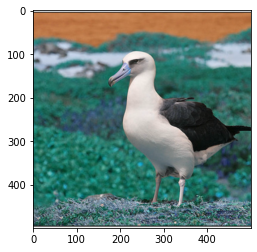

In [5]:
DATADIR="Used data set - Copy"
CATEGORIES=["002.laysan albatross","010.red winged blackbird","041.scissor tailed flycatcher","114.black throated sparrow",
            "126.nelson sharp tailed sparrow","130.tree sparrow","151.black capped vireo"]
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
    

In [6]:
print(img_array.shape)

(500, 500, 3)


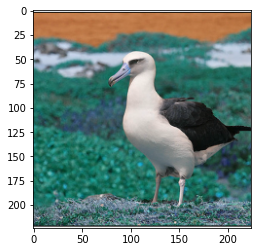

In [7]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [8]:
training_data=[]
img_size=224

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
                
            except Exception as e:
                pass
            
create_training_data()

In [9]:
print(len(training_data))

410


In [10]:
a=training_data[0][0]
a.shape

(224, 224, 3)

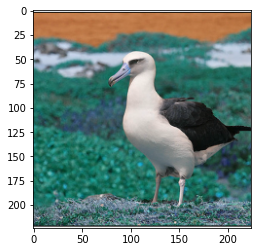

In [11]:
plt.imshow(a)

In [12]:
import random
random.shuffle(training_data)

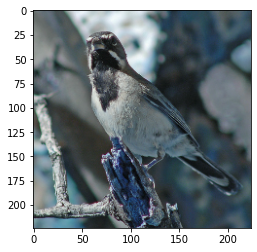

In [13]:
b=training_data[0][0]
plt.imshow(b)

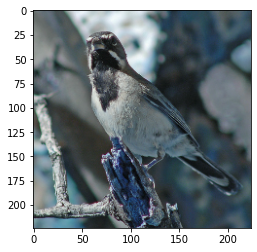

In [14]:
img_size=224
new_array=cv2.resize(b,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [15]:
X_vgg=[]
y_vgg=[]

for features,label in training_data:
    X_vgg.append(features)
    y_vgg.append(label)
    
X_vgg=np.array(X_vgg).reshape(-1,224,224,3)

### Saving Data after Feature Engineering

In [16]:
import pickle

pickle_out=open("X_google.pickle","wb")
pickle.dump(X_vgg,pickle_out)
pickle_out.close()

pickle_out=open("y_google.pickle","wb")
pickle.dump(y_vgg,pickle_out)
pickle_out.close()

In [17]:
pickle_in=open("X_google.pickle","rb")
X=pickle.load(pickle_in)

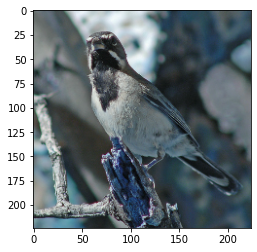

In [18]:
plt.imshow(X[0])

In [19]:


import pickle
X=pickle.load(open("X_google.pickle","rb"))
y=pickle.load(open("y_google.pickle","rb"))


### Categorization

In [20]:
from tensorflow.keras.utils import to_categorical


In [21]:
y=to_categorical(y,7)

In [22]:
y[0]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
X=X/255

In [24]:
s=X[0]
s.max()

0.996078431372549

In [25]:
X.shape

(410, 224, 224, 3)

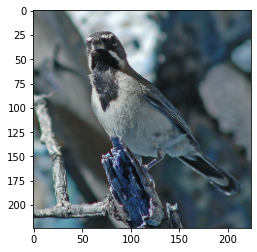

In [26]:

plt.imshow(s)

### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train,X_validate,y_train,y_validate=train_test_split(X_train,y_train,test_size=0.125,random_state=142)

In [30]:
X_train.shape

(287, 224, 224, 3)

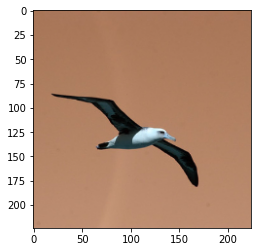

In [31]:
plt.imshow(X_train[0])

In [32]:
y_train[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
X_validate.shape

(41, 224, 224, 3)

In [34]:
X_test.shape

(82, 224, 224, 3)

In [ ]:
### Saving Data after Categorization and Train Test Split
Saving data at regular interval is good as it avoids doing fresh start.

In [35]:
import pickle

pickle_out=open("X_train_google.pickle","wb")
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out=open("y_train_google.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out=open("X_validate_google.pickle","wb")
pickle.dump(X_validate,pickle_out)
pickle_out.close()

pickle_out=open("y_validate_google.pickle","wb")
pickle.dump(y_validate,pickle_out)
pickle_out.close()


pickle_out=open("X_test_google.pickle","wb")
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out=open("y_test_google.pickle","wb")
pickle.dump(y_test,pickle_out)
pickle_out.close()

In [36]:
import pickle
X_train=pickle.load(open("X_train_google.pickle","rb"))
y_train=pickle.load(open("y_train_google.pickle","rb"))

X_validate=pickle.load(open("X_validate_google.pickle","rb"))
y_validate=pickle.load(open("y_validate_google.pickle","rb"))

X_test=pickle.load(open("X_test_google.pickle","rb"))
y_test=pickle.load(open("y_test_google.pickle","rb"))


In [37]:
X_train.shape

(287, 224, 224, 3)

In [ ]:
### Importing Tensorflow and Keras Libraries

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,AveragePooling2D,Concatenate,Input,ZeroPadding2D

In [39]:
kernel_init = tf.keras.initializers.glorot_uniform()
bias_init = tf.keras.initializers.Constant(value=0.1)

## Google Net architecture

In [41]:
#inception module
import tensorflow as tf
import math 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,Dense,Dropout,Activation,Flatten,Conv2D,Concatenate,Input,BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import LeakyReLU

visible = Input(shape=(224, 224, 3))
#conv1=Sequential()
                # 7x7 conv
conv1=Conv2D(64,(7,7),strides=2,activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(visible)
pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(conv1)
                # 3x3 conv
conv2 = Conv2D(64, (1,1), padding='same', activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(pool1)
conv3 = Conv2D(192, (3,3), padding='same', activation='relu',kernel_initializer=kernel_init, bias_initializer=bias_init)(conv2)
                # 3x3 max pooling
pool2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(conv3)
BNlayer = BatchNormalization()(pool2)
                # concatenate filters, assumes filters/channels last




# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
    
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = Concatenate(axis=-1)([conv1, conv3, conv5, pool])
	return layer_out
 



# add inception block 3
inception3a = inception_module(BNlayer,64,96,128,16,32,32)
inception3b = inception_module(inception3a,128, 128, 192, 32, 96, 64)

#max pool

pool3 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception3b)
BNlayer1 = BatchNormalization()(pool3)

# add inception block 4

inception4a = inception_module(BNlayer1,192,96,208,16,48,64)
inception4b = inception_module(inception4a,160,112,224,24,64,64)
inception4c = inception_module(inception4b,128,128,256,24,64,64)
inception4d = inception_module(inception4c,112,144,288,32,64,64)
inception4e = inception_module(inception4d,256,160,320,32,128,128)

#max pool

pool4 = MaxPooling2D((3,3), strides=(2,2), padding='same')(inception4e)
BNlayer2 = BatchNormalization()(pool4)

# add inception block 5

inception5a = inception_module(BNlayer2,256,160,320,32,128,128)
inception5b = inception_module(inception5a,384,192,384,48,128,128)

# avg pool
avg_pool = AveragePooling2D((7,7), strides=(1,1), padding='valid')(inception5b)
BNlayer3 = BatchNormalization()(avg_pool)
flatten=(Flatten( ))(BNlayer3)
dropout=Dropout(0.4)(flatten)
#linear1=Dense(1000,activation='relu')(dropout)
#dropout2=Dropout(0.2)(linear1)
linear2=Dense(490)(dropout)
LeakyRelu=LeakyReLU(alpha=0.1)(linear2)
dropout1=Dropout(0.3)(LeakyRelu)
#linear3=Dense(70,activation='relu')(dropout2)
final=Dense(7,activation='softmax')(dropout1)


# create model
model = Model(inputs=visible, outputs=final)
epochs = 100
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=True)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy'], loss_weights=[1], optimizer=sgd, metrics=['accuracy'])
#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

# summarize model
model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 109, 109, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 55, 55, 64)   0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 55, 55, 64)   4160        max_pooling2d_3[0][0]            
______________________________________________________________________________________________

In [42]:
X_train.shape

(287, 224, 224, 3)

### Training the Model

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
history = model.fit(X_train, y_train, validation_data=(X_validate,y_validate), epochs=epochs, batch_size=16, callbacks=[lr_sc])


Epoch 00001: LearningRateScheduler reducing learning rate to 0.01.
Epoch 1/100
18/18 [==============================] - 7s 375ms/step - loss: 3.2013 - accuracy: 0.1707 - val_loss: 906.9232 - val_accuracy: 0.2683 - lr: 0.0100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.01.
Epoch 2/100
18/18 [==============================] - 3s 163ms/step - loss: 3.4391 - accuracy: 0.1986 - val_loss: 513.3278 - val_accuracy: 0.1707 - lr: 0.0100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.01.
Epoch 3/100
18/18 [==============================] - 3s 161ms/step - loss: 3.7848 - accuracy: 0.1882 - val_loss: 108.5495 - val_accuracy: 0.1707 - lr: 0.0100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.01.
Epoch 4/100
18/18 [==============================] - 3s 161ms/step - loss: 3.7675 - accuracy: 0.1568 - val_loss: 42.0244 - val_accuracy: 0.1220 - lr: 0.0100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.01.
Epoch 5/100
18/18 [==========

### Evaluation

In [46]:
metrics=pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy,lr
0,3.201332,0.170732,906.923218,0.268293,0.010000
1,3.439114,0.198606,513.327820,0.170732,0.010000
2,3.784836,0.188153,108.549469,0.170732,0.010000
3,3.767502,0.156794,42.024372,0.121951,0.010000
4,3.339539,0.177700,102.362671,0.121951,0.010000
...,...,...,...,...,...
95,0.201091,0.937282,3.017546,0.390244,0.006127
96,0.073342,0.982578,4.194506,0.341463,0.006127
97,0.080167,0.975610,4.051348,0.341463,0.006127
98,0.114759,0.975610,2.868331,0.439024,0.006127


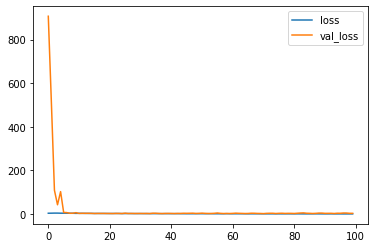

In [47]:
metrics[['loss','val_loss']].plot()

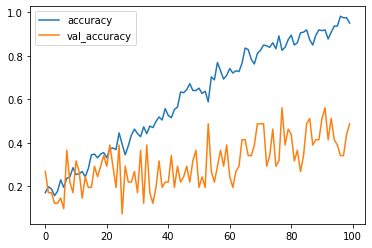

In [48]:
metrics[['accuracy','val_accuracy']].plot()

In [49]:
model.metrics_names

['loss', 'accuracy']

In [50]:
model.save('DL_ASSIGN_3_TASK_1_GOOGLE_net.h5')

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model=load_model('DL_ASSIGN_3_TASK_1_GOOGLE_net.h5')

In [53]:
a=X_test[:5]
b=y_test[:5]
c=model.predict(a)

b=np.argmax(c,axis=1)
b=to_categorical(b,7)


In [54]:
b

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

#### Classification Report & Confusion Matrix

In [55]:
from sklearn.metrics import classification_report,multilabel_confusion_matrix

In [56]:
predictions=model.predict(X_test)
predictions=np.argmax(predictions,axis=1)
predictions=to_categorical(predictions,7)

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.38      0.30      0.33        10
           1       0.88      0.50      0.64        14
           2       0.75      0.35      0.48        17
           3       0.11      0.08      0.09        13
           4       0.56      0.42      0.48        12
           5       0.16      0.23      0.19        13
           6       0.10      0.67      0.17         3

   micro avg       0.33      0.33      0.33        82
   macro avg       0.42      0.36      0.34        82
weighted avg       0.48      0.33      0.37        82
 samples avg       0.33      0.33      0.33        82



In [58]:
predictions[0]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [59]:
y_test[0]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [60]:
print(multilabel_confusion_matrix(y_test,predictions))

[[[67  5]
  [ 7  3]]

 [[67  1]
  [ 7  7]]

 [[63  2]
  [11  6]]

 [[61  8]
  [12  1]]

 [[66  4]
  [ 7  5]]

 [[53 16]
  [10  3]]

 [[60 19]
  [ 1  2]]]


#### Prediction

In [61]:
multilabel_confusion_matrix(y_test,predictions)[0]

array([[67,  5],
       [ 7,  3]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


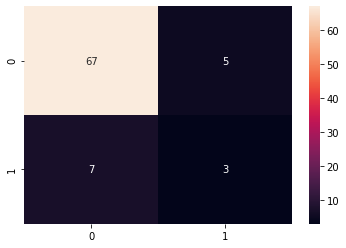

In [62]:
import seaborn as sns
sns.heatmap(multilabel_confusion_matrix(y_test,predictions)[0],annot=True)

## Done !
Model Performed Good